# Random Forest Regression

## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import holoviews as hv

## Importing the dataset

In [2]:
Targ='tds'

In [3]:
dataset = pd.read_csv("tds.csv")
dataset.head()

,t,sta,ec_mtz,ec_sac,ec_sjr,ec_east,ec_ag,ec,tds,vol
0,3/20/1990,Banks PP,193,152,10.48,6,79.37,445.0,250.0,440.85
1,4/18/1990,Banks PP,520,155,7.75,4,59.34,706.0,375.0,746.09
2,5/15/1990,Banks PP,381,132,31.47,3,70.67,698.0,385.0,618.14
3,6/19/1990,Banks PP,254,126,27.14,6,108.10,615.0,350.0,521.24
4,7/18/1990,Banks PP,242,150,6.70,2,99.73,385.0,218.0,500.43


In [4]:
dataset = pd.read_csv("tds.csv")
x = dataset[['sta','ec_mtz','ec_sac','ec_sjr','ec_east','ec_ag','ec']]
y=dataset[Targ]
x = pd.DataFrame(x)
y = pd.DataFrame(y)
df = pd.concat([x, y], axis=1)
Station = pd.get_dummies(x['sta'])
x.drop(['sta'],axis=1,inplace=True)
x=pd.concat([Station, x], axis=1)

x = dataset[['sta','ec_mtz','ec_sac','ec_sjr','ec_east','ec_ag','ec']]
y=dataset[Targ]
x = pd.DataFrame(x)
y = pd.DataFrame(y)
df = pd.concat([x, y], axis=1)

In [5]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1,random_state=2)
print('y_test.shape =',y_test.shape),print('x_test.shape =',x_test.shape),
print('y_train.shape =',y_train.shape),print('x_train.shape =',x_train.shape)

y_test.shape = (503, 1)
x_test.shape = (503, 59)
y_train.shape = (4522, 1)
x_train.shape = (4522, 59)


(None, None)

## Training the Random Forest Regression model on the whole dataset

In [6]:
#from sklearn.neural_network import MLPRegressor
#from sklearn.datasets import make_regression

#regressor= MLPRegressor(random_state=1, max_iter=500).fit(X_train, y_train)
#regressor= GaussianNB()
#regressor.fit(X_train, y_train)

In [7]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 100, random_state = 0) 

regressor.fit(x_train, y_train)

<ipython-input-7-e95a758b9990>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regressor.fit(x_train, y_train)


RandomForestRegressor(random_state=0)

## Predicting a new result

In [8]:
pred_test=regressor.predict(x_test)
pred_train=regressor.predict(x_train)
pred=regressor.predict(x)

## Visualising the Random Forest Regression results (higher resolution)

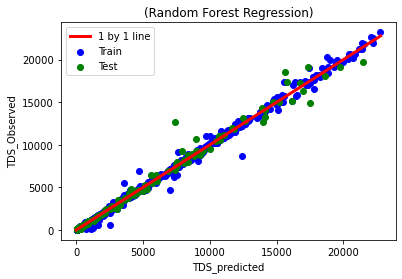

In [9]:
plt.scatter(pred_train,y_train, color = 'blue',label='Train')
plt.scatter(pred_test,y_test, color = 'green',label='Test')
plt.plot([0,max(pred)+10],[0,max(pred)+10], color = 'red',linewidth=3,label='1 by 1 line')
plt.title('(Random Forest Regression)')
plt.xlabel('TDS_predicted')
plt.ylabel('TDS_Observed')
plt.legend()
plt.show()

In [10]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [11]:
print('r2_Train =',round(r2_score(y_train, pred_train),4)),
print('r2_Test =',round(r2_score(y_test, pred_test),4)),
print('r2_All =',round(r2_score(y, pred),4))

r2_Train = 0.9983
r2_Test = 0.9894
r2_All = 0.9973


In [12]:
print('MAE_Train =',round(mean_absolute_error(y_train, pred_train),3)),
print('MAE_Test =',round(mean_absolute_error(y_test, pred_test),3)),
print('MAE_All =',round(mean_absolute_error(y, pred),3))

MAE_Train = 32.167
MAE_Test = 92.162
MAE_All = 38.172
